### Importing Libraries

In [28]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import plot_confusion_matrix,plot_precision_recall_curve,plot_roc_curve, confusion_matrix,precision_score,recall_score,f1_score,accuracy_score
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler

### Data Reading

In [29]:
data=pd.read_csv("feature_without_cor.csv", index_col=[0])
label=pd.read_csv("label.csv",index_col=[0])


### Data for training and testing the model

In [35]:
def final_data(data, label, undersampling=False,oversampling=False,standardization=False):

        ##spliting the data
        X_train, X_test, y_train, y_test = train_test_split(data,label, test_size=0.05,stratify = label, random_state=42)
        y_train=np.array(y_train).reshape(-1)
        y_test=np.array(y_test).reshape(-1)


        #Undersampling
        if undersampling is True:
            rus = RandomUnderSampler(replacement=False)
            X_train, y_train= rus.fit_sample( X_train, y_train)
        #Oversampling
        if oversampling is True:
            ros= RandomOverSampler()
            X_train, y_train= ros.fit_sample( X_train, y_train)


        ##Standardization of data
        if standardization is True:
            sc=StandardScaler()
            sc.fit(X_train)
            X_train=sc.transform(X_train)
            X_test=sc.transform(X_test)


        X_train=np.array(X_train)
        X_test=np.array(X_test)
        
        return X_train, y_train, X_test, y_test
    

In [36]:
X_train, y_train, X_test, y_test=final_data(data,label,undersampling=True, oversampling=False, standardization=True)

### Plot metrices

In [37]:
#plot_confusion_matrix(estimator=random_forest,X=X_test,y_true=y_test,values_format='d')
def plot_confusion_matrix(estimator,X,y_true, classifier_name):
    y_pred=estimator.predict(X)
    
    #y_pred = estimator.predict_proba(X)[:, 1] > .55
    
    cm=confusion_matrix(y_true=y_true,y_pred=y_pred)
    data=pd.DataFrame(cm, index=['Not_default', "Defalut"], columns=['Not_default', "Defalut"])
    sns.heatmap(data,annot=True,fmt='g',cbar=False)
    plt.ylabel("True label",size=12)
    plt.xlabel("Predicted label",size=12)
    plt.title("Confusion Matrix "+ classifier_name , size=15)
    plt.tight_layout()
    plt.show()
    print("Accuracy_score:",accuracy_score(y_true=y_true,y_pred=y_pred)//0.01/100)
    print("Precision:",precision_score(y_true=y_true,y_pred=y_pred)//0.01/100)
    print("Recall:",recall_score(y_true=y_true,y_pred=y_pred)//0.01/100)
    print("F1_Score:",f1_score(y_true=y_true,y_pred=y_pred)//0.01/100)

### PCA Function

In [38]:
def apply_pca(train_data, test_data):
    pca=PCA(n_components=3)
    pca.fit(train_data)
    train_data=pca.transform(train_data)
    test_data=pca.transform(test_data)
    
    return train_data, test_data

In [39]:
from sklearn.model_selection import cross_val_score
def cross_val(X_train, y_train, model):
    # Applying k-Fold Cross Validation
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
    return accuracies.mean()

### Classification function

In [40]:
def classifier_(X_train,y_train,X_test,y_test, applyPCA=False):
    
    if applyPCA is True:
    #logistic regression
        print("Applied PCA Transform")
        X_train,X_test= apply_pca(X_train, X_test)
    
    print("***************Logistic Regressin Output***************")
    model=LogisticRegressionCV(cv=5)
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    plot_confusion_matrix(estimator=model,X=X_test,y_true=y_test,classifier_name="Logistic Regression")
    print("Cross Validation Accuracy:", cross_val(X_train, y_train, model))
    print()
    
     
    print("***************Random forest Output***************")
    model=RandomForestClassifier()
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    plot_confusion_matrix(estimator=model,X=X_test,y_true=y_test,classifier_name="Random Forest")
    print("Cross Validation Accuracy:", cross_val(X_train, y_train, model))
    print()
    
    print("***************XGBClassifier Output***************")
    model= XGBClassifier()
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    plot_confusion_matrix(estimator=model,X=X_test,y_true=y_test,classifier_name="XGBClassifier")
    print("Cross Validation Accuracy:", cross_val(X_train, y_train, model))
    


###  Case: 1 Training model without undersampling and oversampling

***************Logistic Regressin Output***************


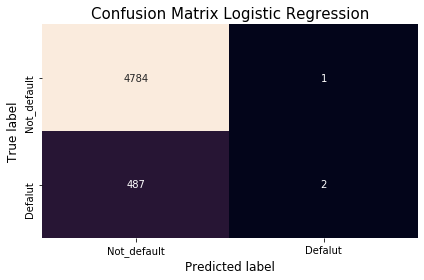

Accuracy_score: 0.9
Precision: 0.66
Recall: 0.0
F1_Score: 0.0
Cross Validation Accuracy: 0.9074323562067941

***************Random forest Output***************


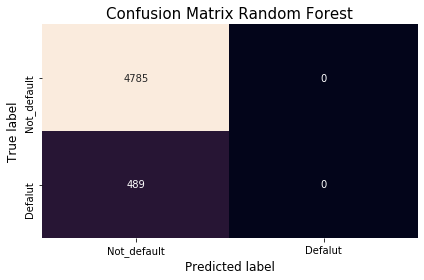

Accuracy_score: 0.9
Precision: 0.0
Recall: 0.0
F1_Score: 0.0
Cross Validation Accuracy: 0.9073225747716105

***************XGBClassifier Output***************


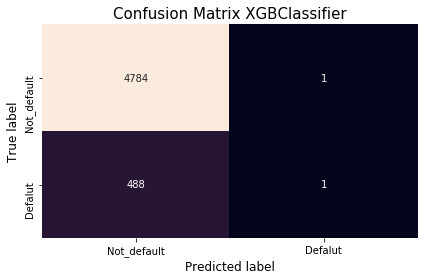

Accuracy_score: 0.9
Precision: 0.49
Recall: 0.0
F1_Score: 0.0
Cross Validation Accuracy: 0.9074423372427759


In [41]:
X_train, y_train, X_test, y_test=final_data(data,label,undersampling=False,oversampling=False, standardization=True)
classifier_(X_train,y_train,X_test,y_test, applyPCA=False)

### Case: 2 Training model with undersampling 

***************Logistic Regressin Output***************


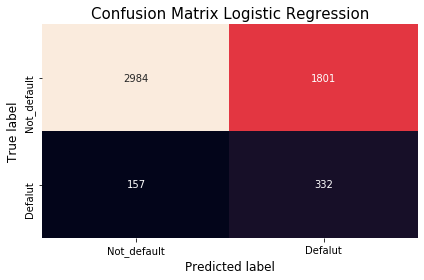

Accuracy_score: 0.62
Precision: 0.15
Recall: 0.67
F1_Score: 0.25
Cross Validation Accuracy: 0.6441786085853882

***************Random forest Output***************


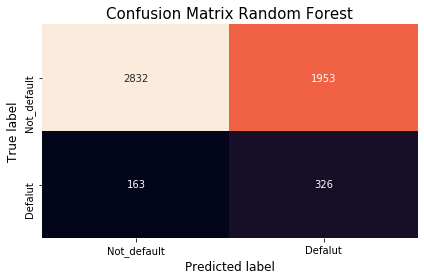

Accuracy_score: 0.59
Precision: 0.14
Recall: 0.66
F1_Score: 0.23
Cross Validation Accuracy: 0.6204536879895419

***************XGBClassifier Output***************


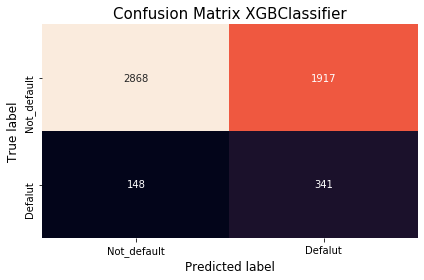

Accuracy_score: 0.6
Precision: 0.15
Recall: 0.69
F1_Score: 0.24
Cross Validation Accuracy: 0.644662797726683


In [42]:
X_train, y_train, X_test, y_test=final_data(data,label,undersampling=True,oversampling=False, standardization=True)
classifier_(X_train,y_train,X_test,y_test, applyPCA=False)

### Case: 3 Training model with undersampling And PCA

Applied PCA Transform
***************Logistic Regressin Output***************


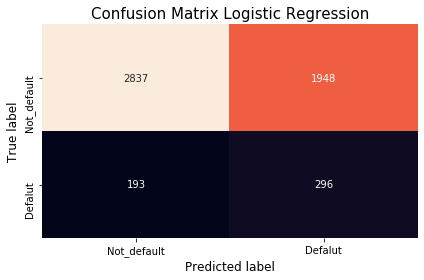

Accuracy_score: 0.59
Precision: 0.13
Recall: 0.6
F1_Score: 0.21
Cross Validation Accuracy: 0.6008710976116453

***************Random forest Output***************


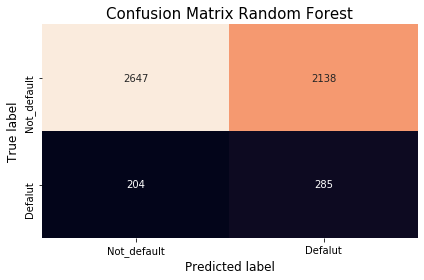

Accuracy_score: 0.55
Precision: 0.11
Recall: 0.58
F1_Score: 0.19
Cross Validation Accuracy: 0.5619221138125963

***************XGBClassifier Output***************


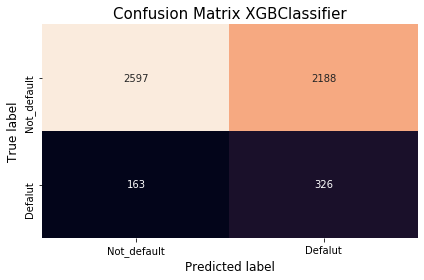

Accuracy_score: 0.55
Precision: 0.12
Recall: 0.66
F1_Score: 0.21
Cross Validation Accuracy: 0.6028616320663257


In [45]:
X_train, y_train, X_test, y_test=final_data(data,label,undersampling=True,oversampling=False, standardization=True)
classifier_(X_train,y_train,X_test,y_test, applyPCA=True)